# Binary Classifiction

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Function to generate random data for binary classification
def generate_data(num_samples=100, seed=None):
    """
    Generate random 2D data for two classes.

    Parameters:
    - num_samples (int): Total number of samples to generate (per class will be num_samples / 2).
    - seed (int, optional): Random seed for reproducibility.

    Returns:
    - X (numpy.ndarray): Feature matrix of shape (num_samples, 2).
    - y (numpy.ndarray): Labels of shape (num_samples,).
    """

    # Half the samples for each class
    num_samples_per_class = num_samples // 2

    # Class 0: Cluster around (2, 2)
    class_0 = np.random.randn(num_samples_per_class, 2) + np.array([2, 2])

    # Class 1: Cluster around (-2, -2)
    class_1 = np.random.randn(num_samples_per_class, 2) + np.array([-2, -2])

    # Combine the data
    X = np.vstack((class_0, class_1))
    y = np.hstack((np.zeros(num_samples_per_class), np.ones(num_samples_per_class)))

    return X, y

In [ ]:
# Generate the data
X, y = generate_data(num_samples=200, seed=42)

In [ ]:
print(X)
print(y)

[[ 1.65914043  0.874882  ]
 [ 1.82313045  3.29723321]
 [ 3.10657603  2.98953264]
 [ 2.42762955  0.51799566]
 [ 1.69270351  1.45551611]
 [ 0.31797998  1.59654072]
 [ 0.64806932  1.18181385]
 [ 2.45035166  3.15664457]
 [ 2.66991803  1.3063285 ]
 [-0.03599146  2.89191404]
 [ 0.2757577   0.70177836]
 [ 2.27360297  2.21117054]
 [ 1.90275807  0.69957959]
 [ 1.19933124  1.03042195]
 [ 0.56410646  3.12043248]
 [ 0.05674055  1.75404247]
 [ 1.13186175  2.4085413 ]
 [ 3.11026906  2.24118578]
 [ 3.4290262   2.03270704]
 [ 2.41249048  1.413323  ]
 [ 2.20830628  0.51807149]
 [ 2.76584975  1.98170851]
 [ 2.67542954  0.52648045]
 [ 3.5095174   2.39657281]
 [ 1.79541513  1.79354968]
 [ 1.2019959   1.07484227]
 [ 2.33633274  1.59546267]
 [ 0.42183093  3.07601628]
 [ 0.26152641  3.68231226]
 [ 2.00319422  1.35174079]
 [ 1.56300541  2.04646756]
 [ 1.14984251  1.84807329]
 [ 1.42935904  2.33002816]
 [ 1.55933486  2.14129311]
 [ 2.58772832  1.52147522]
 [ 1.79884773  2.11049778]
 [ 4.68164935  2.41766627]
 

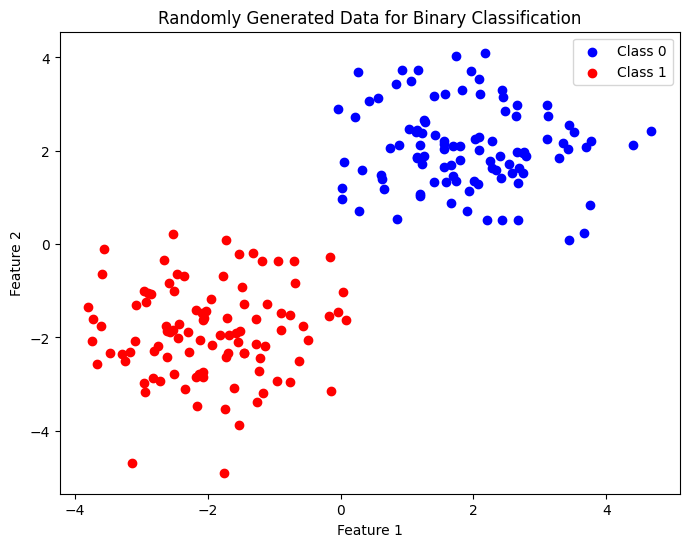

In [ ]:
# Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Randomly Generated Data for Binary Classification')
plt.legend()
plt.show()

In [ ]:
# Define a linear neural network class
class SimpleLinearNN:
    def __init__(self, input_dim):
        self.weights = np.random.randn(input_dim, 1)
        self.bias = np.random.randn(1)

    def forward(self, X):
        return self.sigmoid(np.dot(X, self.weights) + self.bias)

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def sigmoid_derivative(self, z):
        return z * (1 - z)

    def compute_loss(self, y_pred, y_true):
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    def backward(self, X, y, y_pred, learning_rate):
        m = X.shape[0]
        dz = y_pred - y.reshape(-1, 1)
        dw = np.dot(X.T, dz) / m
        db = np.sum(dz) / m

        self.weights -= learning_rate * dw
        self.bias -= learning_rate * db

In [ ]:
# Training loop
def train(X, y, model, epochs=1000, learning_rate=0.01):
    losses = []
    for epoch in range(epochs):
        # Forward pass
        y_pred = model.forward(X)

        # Compute loss
        loss = model.compute_loss(y_pred, y)
        losses.append(loss)

        # Backward pass
        model.backward(X, y, y_pred, learning_rate)

        # Print loss every 100 epochs
        if (epoch + 1) % 100 == 0:
            print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}")

    return losses

In [ ]:
# Initialize and train the model
model = SimpleLinearNN(input_dim=2)
losses = train(X, y, model, epochs=1000, learning_rate=0.1)

Epoch 100/1000, Loss: 2.4862
Epoch 200/1000, Loss: 2.8692
Epoch 300/1000, Loss: 3.1322
Epoch 400/1000, Loss: 3.3362
Epoch 500/1000, Loss: 3.5045
Epoch 600/1000, Loss: 3.6488
Epoch 700/1000, Loss: 3.7754
Epoch 800/1000, Loss: 3.8887
Epoch 900/1000, Loss: 3.9915
Epoch 1000/1000, Loss: 4.0856


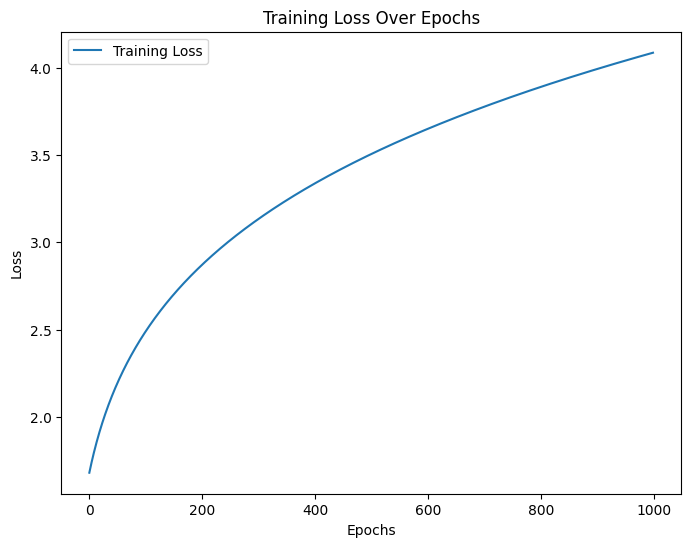

In [ ]:
# Plot training loss
plt.figure(figsize=(8, 6))
plt.plot(losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()

In [ ]:
# Visualize decision boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    grid = np.c_[xx.ravel(), yy.ravel()]
    predictions = model.forward(grid)
    predictions = (predictions > 0.5).astype(int).reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, predictions, alpha=0.8, cmap='coolwarm')
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.legend()
    plt.show()

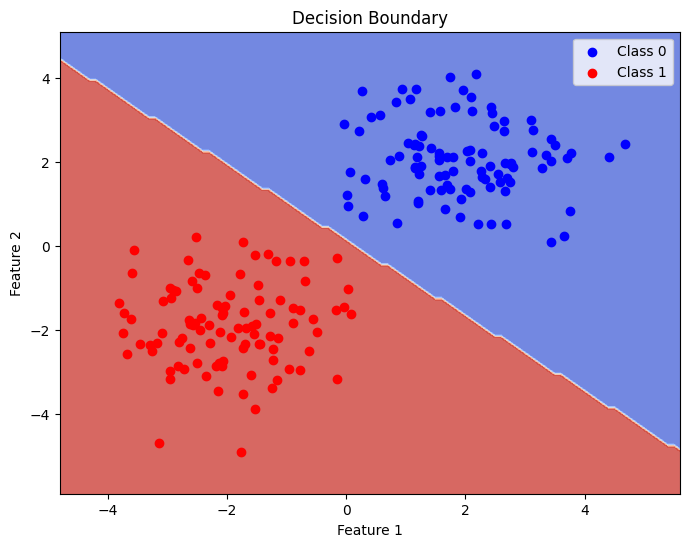

In [ ]:
plot_decision_boundary(X, y, model)